# Homicide data in Mexico and the United States
## *A comparison of homicides by weapon and sex*

First, let us compare the homicide data by weapon type to observe any trends over the decade of 2007 - 2017:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#First, let's create a timeline for Mexico's homicides from 2007-2017 by weapon type using a line chart, 
#one line for each type

with open('homicidios_armas_timeline.csv') as armas:
    # To get rid of the odd '\ufeff' as well as the typical '\n.' we will strip and replace to clean the values
    armas_data = [x.strip().replace('\ufeff','').split(",") for x in armas.readlines()]
    armas_headers = armas_data[0]
#     armas_headers = [x.strip().replace('\ufeff','').split(",") for x in armas.readline()]
#     armas_data = [x.strip().replace('\ufeff','').split(",") for x in armas.readlines()]
    print(armas_data)

[['Year', 'Knife', 'Firearm', 'Other', 'No data', 'Total'], ['1997', '987', '2522', '13357', '0', '16866'], ['1998', '1428', '3286', '9502', '0', '14216'], ['1999', '1380', '4390', '8849', '0', '14619'], ['2000', '1382', '3605', '8862', '0', '13849'], ['2001', '1401', '3512', '8942', '0', '13855'], ['2002', '1546', '2616', '4197', '4789', '13148'], ['2003', '1241', '3006', '4149', '4280', '12676'], ['2004', '1195', '2858', '3371', '4234', '11658'], ['2005', '1146', '3208', '2892', '4000', '11246'], ['2006', '1135', '3610', '3164', '3897', '11806'], ['2007', '1265', '4040', '4202', '746', '10253'], ['2008', '2310', '5085', '3458', '2302', '13155'], ['2009', '2324', '8804', '3946', '1044', '16118'], ['2010', '2045', '11987', '4910', '1201', '20143'], ['2011', '2457', '12615', '6310', '1027', '22409'], ['2012', '2411', '11391', '7229', '428', '21459'], ['2013', '2028', '9774', '5995', '309', '18106'], ['2014', '2227', '8589', '4079', '625', '15520'], ['2015', '2371', '9531', '4264', '743'

In [3]:
# The numbers are strings, so we need to convert them to numeric values, in this case integers

def convert_to_ints(values):
    return [int(v) for v in values]

In [4]:
armas_data = [convert_to_ints(row) for row in armas_data[1:]]

# Currently, we have more years than needed - we only want a decade. Let's get rid of the unnecessary years.

timeline = []
for year in armas_data:
    if year[0] >= 2007:
        timeline.append(year)
print('timeline', timeline)

timeline [[2007, 1265, 4040, 4202, 746, 10253], [2008, 2310, 5085, 3458, 2302, 13155], [2009, 2324, 8804, 3946, 1044, 16118], [2010, 2045, 11987, 4910, 1201, 20143], [2011, 2457, 12615, 6310, 1027, 22409], [2012, 2411, 11391, 7229, 428, 21459], [2013, 2028, 9774, 5995, 309, 18106], [2014, 2227, 8589, 4079, 625, 15520], [2015, 2371, 9531, 4264, 743, 16909], [2016, 2666, 12603, 4663, 615, 20547], [2017, 2884, 16949, 5185, 479, 25497]]


In [7]:
# Let's create a dictionary so we can pull the values we want for each line in our line chart

types = {}

for i in range(len(armas_headers)):
    types[armas_headers[i]] = [val[i] for val in timeline]
print(types)

{'Year': [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], 'Knife': [1265, 2310, 2324, 2045, 2457, 2411, 2028, 2227, 2371, 2666, 2884], 'Firearm': [4040, 5085, 8804, 11987, 12615, 11391, 9774, 8589, 9531, 12603, 16949], 'Other': [4202, 3458, 3946, 4910, 6310, 7229, 5995, 4079, 4264, 4663, 5185], 'No data': [746, 2302, 1044, 1201, 1027, 428, 309, 625, 743, 615, 479], 'Total': [10253, 13155, 16118, 20143, 22409, 21459, 18106, 15520, 16909, 20547, 25497]}


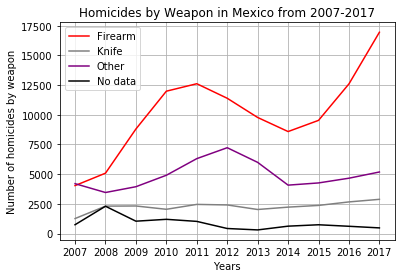

In [15]:
# Now we can plot!

x_vals = types['Year']
firearm_y_vals = types['Firearm']
knife_y_vals = types['Knife']
other_y_vals = types['Other']
nd_y_vals = types['No data']

plt.title('Homicides by Weapon in Mexico from 2007-2017')
plt.xlabel("Years")
plt.ylabel("Number of homicides by weapon")
# Showing all the years as labels is just a personal preference
plt.xticks([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017])
plt.plot(x_vals, firearm_y_vals, color='red', label='Firearm')
plt.plot(x_vals, knife_y_vals, color='gray', label='Knife')
plt.plot(x_vals, other_y_vals, color='purple', label='Other')
plt.plot(x_vals, nd_y_vals, color='black', label='No data')
plt.grid(True)
plt.legend()
plt.show()

## What does this graph show us?

Clearly, homicides in Mexico are mostly committed by firearm, which is not too surprising given the wider range of a firearm, and thus its higher effectiveness. Every weapon type other than *no data* has seen a rise, especially firearm homicides, which is no surprise either given the current issues of police corruption and resulting [security privatization](https://www.reuters.com/article/us-mexico-security/mexico-private-security-boom-adds-to-corruption-use-of-force-study-idUSKBN1H339B), as well as the prevalence of [gang/cartel activity](https://www.theguardian.com/world/2018/jul/23/mexico-crime-homicides-violence-up-report) throughout the country. 

However, the slight decline in *no data* records may indicate that data collection practices are becoming more precise and thus more robust, which is a great step towards measuring and counteracting Mexico's longstanding issue with violence and instability.